In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd /content/drive/MyDrive/Project_AI
!ls

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving semantics_results.csv to semantics_results.csv


In [ ]:
import pandas as pd

df = pd.read_csv("./semantics_results.csv")

In [ ]:
df.head()

Input.text1  ...                                        Description
0  oh dear, oh dear! what were they thinking of ?...  ...  Compare two short pieces of English text and d...
1  oh dear, oh dear! what were they thinking of ?...  ...  Compare two short pieces of English text and d...
2  oh dear, oh dear! what were they thinking of ?...  ...  Compare two short pieces of English text and d...
3  oh dear, oh dear! what were they thinking of ?...  ...  Compare two short pieces of English text and d...
4  oh dear, oh dear! what were they thinking of ?...  ...  Compare two short pieces of English text and d...

[5 rows x 7 columns]

In [ ]:
label_map = { 'Strongly Agree': 5, 'Agree': 4, 'Not sure': 3, 'Disagree': 2, 'Strongly Disagree': 1}
df['label'] = df['Answer.semantic-similarity.label'].map(lambda s: label_map[s])

In [ ]:
df

Input.text1  ... label
0     oh dear, oh dear! what were they thinking of ?...  ...     4
1     oh dear, oh dear! what were they thinking of ?...  ...     4
2     oh dear, oh dear! what were they thinking of ?...  ...     4
3     oh dear, oh dear! what were they thinking of ?...  ...     4
4     oh dear, oh dear! what were they thinking of ?...  ...     4
...                                                 ...  ...   ...
3995  this is my favorite place for cupcakes they ha...  ...     2
3996  this is my favorite place for cupcakes they ha...  ...     4
3997  this is my favorite place for cupcakes they ha...  ...     4
3998  this is my favorite place for cupcakes they ha...  ...     2
3999  this is my favorite place for cupcakes they ha...  ...     4

[4000 rows x 8 columns]

In [ ]:
!pip install textattack
!pip install bert-score

     |████████████████████████████████| 327kB 9.6MB/s 
     |████████████████████████████████| 778kB 15.2MB/s 
     |████████████████████████████████| 235kB 38.6MB/s 
     |████████████████████████████████| 71kB 10.0MB/s 
     |████████████████████████████████| 61kB 8.9MB/s 
     |████████████████████████████████| 1.1MB 46.2MB/s 
     |████████████████████████████████| 102kB 12.7MB/s 
     |████████████████████████████████| 3.0MB 50.3MB/s 
     |████████████████████████████████| 153kB 58.1MB/s 
     |████████████████████████████████| 245kB 59.1MB/s 
     |████████████████████████████████| 686kB 50.4MB/s 
     |████████████████████████████████| 317kB 47.6MB/s 
     |████████████████████████████████| 1.8MB 47.4MB/s 
     |████████████████████████████████| 1.1MB 49.7MB/s 
     |████████████████████████████████| 890kB 50.4MB/s 
     |████████████████████████████████| 245kB 56.8MB/s 
     |████████████████████████████████| 17.7MB 215kB/s 
     |████████████████████████████████| 983kB 42.0MB

In [ ]:
ref = df["Input.text1"][0]
cand = df["Input.text2"][0]

In [ ]:
import bert_score
import torch
from tqdm import tqdm
bert_scorer = bert_score.BERTScorer(
            model_type="bert-base-uncased", idf=False,
            device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
        )
SCORE_TYPE2IDX = {"precision": 0, "recall": 1, "f1": 2}
# # df['bert_score'] = bert_scorer.score([df["Input.text2"]], [df["Input.text1"]])[SCORE_TYPE2IDX["f1"]].item()
# # result = bert_scorer.score([cand], [ref])
# # score = result[SCORE_TYPE2IDX["f1"]].item()
# # print(score)
bert_scores = []
for index, row in tqdm(df.iterrows()):
	cand = row["Input.text2"]
	ref = row["Input.text1"]
	result = bert_scorer.score([cand], [ref])
	score = result[SCORE_TYPE2IDX["f1"]].item()
	bert_scores.append(score)
df["bert_score"] = bert_scores

wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


0it [00:00, ?it/s]/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:1324: FutureWarning: The `max_len` attribute has been deprecated and will be removed in a future version, use `model_max_length` instead.
  FutureWarning,
4000it [01:39, 40.23it/s]


In [ ]:
from textattack.constraints.semantics.sentence_encoders import BERT
from textattack.shared import AttackedText
import string

scores = []
bert = BERT()
for index, row in tqdm(df.iterrows()):
  cand = row["Input.text2"]
  ref = row["Input.text1"]
  ref = AttackedText(ref)
  translator = str.maketrans('', '', string.punctuation)
  cand = ref.generate_new_attacked_text(cand.translate(translator).split(" "))
  score = float(bert._sim_score(ref, cand)[0])
  scores.append(score)
df["bert_sentence_score"] = scores

textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


2020-11-06 10:24:35 INFO: Downloading default packages for language: en (English)...
2020-11-06 10:27:25 INFO: Finished downloading models and saved to /root/stanza_resources.
100%|██████████| 405M/405M [00:15<00:00, 26.5MB/s]
4000it [01:33, 42.77it/s]


General Pseudo-ish Code for adding new scores

In [ ]:
# scores = []
# for index, row in tqdm(df.iterrows()):
#   cand = row["Input.text2"]
#   ref = row["Input.text1"]
#   ref = AttackedText(ref)
#   score = scoring_function(ref, cand)
#   scores.append(score)
# df["column_name"] = scores

Analysis

In [ ]:
df['label'].corr(df['bert_score'])

0.10056494675245772

In [ ]:
for n in range(1, 6000//500+1):
  analysis_df = pd.DataFrame()
  # lengths = []
  for index, row in tqdm(df.iterrows()):
    # lengths.append(len(row['Input.text1']))
    if len(row['Input.text1']) < n*500 and len(row['Input.text1']) > (n-1)*500:
      analysis_df = analysis_df.append(row)
  print("Sentence length between %i and %i: Correlation = %f" % ((n-1)*500, n*500, analysis_df['label'].corr(analysis_df['bert_score'])))

4000it [00:08, 494.90it/s]
55it [00:00, 542.50it/s]

Sentence length between 0 and 500: Correlation = 0.160498


4000it [00:05, 710.39it/s]
436it [00:00, 4305.93it/s]

Sentence length between 500 and 1000: Correlation = 0.204126


4000it [00:02, 1575.19it/s]
270it [00:00, 2650.54it/s]

Sentence length between 1000 and 1500: Correlation = 0.140261


4000it [00:01, 3168.81it/s]
247it [00:00, 2449.02it/s]

Sentence length between 1500 and 2000: Correlation = 0.103375


4000it [00:00, 4995.64it/s]
808it [00:00, 8029.70it/s]

Sentence length between 2000 and 2500: Correlation = 0.063089


4000it [00:00, 7117.87it/s]
756it [00:00, 7556.12it/s]

Sentence length between 2500 and 3000: Correlation = 0.269550


4000it [00:00, 8559.07it/s]
1105it [00:00, 11044.93it/s]

Sentence length between 3000 and 3500: Correlation = 0.165533


4000it [00:00, 8800.93it/s]
1209it [00:00, 12082.61it/s]

Sentence length between 3500 and 4000: Correlation = 0.560449


4000it [00:00, 10734.22it/s]
1191it [00:00, 11904.82it/s]

Sentence length between 4000 and 4500: Correlation = nan


4000it [00:00, 10797.04it/s]
1169it [00:00, 11677.71it/s]

Sentence length between 4500 and 5000: Correlation = nan


4000it [00:00, 9215.39it/s]
1191it [00:00, 11436.65it/s]

Sentence length between 5000 and 5500: Correlation = -0.817624


4000it [00:00, 9472.40it/s]

Sentence length between 5500 and 6000: Correlation = nan


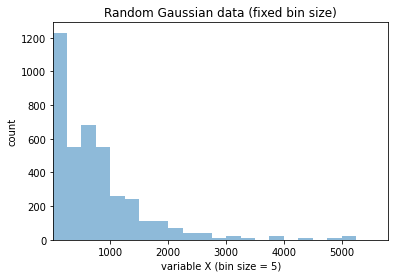

In [ ]:
import numpy as np
import random
from matplotlib import pyplot as plt

# fixed bin size
bins = np.arange(0, 6000, 250) # fixed bin size

plt.xlim([min(lengths)-5, max(lengths)+5])

plt.hist(lengths, bins=bins, alpha=0.5)
plt.title('Random Gaussian data (fixed bin size)')
plt.xlabel('variable X (bin size = 5)')
plt.ylabel('count')

plt.show()

In [ ]:
df['label'].corr(df['bert_sentence_score'])

0.0621164308017006

In [ ]:
for n in range(1, 6000//500+1):
  analysis_df = pd.DataFrame()
  # lengths = []
  for index, row in tqdm(df.iterrows()):
    # lengths.append(len(row['Input.text1']))
    if len(row['Input.text1']) < n*500 and len(row['Input.text1']) > (n-1)*500:
      analysis_df = analysis_df.append(row)
  print("Sentence length between %i and %i: Correlation = %f" % ((n-1)*500, n*500, analysis_df['label'].corr(analysis_df['bert_sentence_score'])))

4000it [00:07, 508.04it/s]
86it [00:00, 434.98it/s]

Sentence length between 0 and 500: Correlation = 0.101494


4000it [00:05, 750.59it/s]
438it [00:00, 4283.04it/s]

Sentence length between 500 and 1000: Correlation = 0.244453


4000it [00:02, 1675.82it/s]
284it [00:00, 2839.03it/s]

Sentence length between 1000 and 1500: Correlation = 0.210087


4000it [00:01, 3165.15it/s]
250it [00:00, 2448.11it/s]

Sentence length between 1500 and 2000: Correlation = 0.195524


4000it [00:00, 5043.21it/s]
809it [00:00, 7908.06it/s]

Sentence length between 2000 and 2500: Correlation = 0.330533


4000it [00:00, 7673.79it/s]
831it [00:00, 8303.53it/s]

Sentence length between 2500 and 3000: Correlation = 0.182078


4000it [00:00, 8939.43it/s]
1167it [00:00, 11669.20it/s]

Sentence length between 3000 and 3500: Correlation = 0.096157


4000it [00:00, 9414.22it/s]
1248it [00:00, 12477.01it/s]

Sentence length between 3500 and 4000: Correlation = 0.560449


4000it [00:00, 10908.03it/s]
1138it [00:00, 11377.22it/s]

Sentence length between 4000 and 4500: Correlation = nan


4000it [00:00, 10111.23it/s]
1220it [00:00, 12197.39it/s]

Sentence length between 4500 and 5000: Correlation = nan


4000it [00:00, 10133.27it/s]
1192it [00:00, 11670.83it/s]

Sentence length between 5000 and 5500: Correlation = 0.817624


4000it [00:00, 9189.44it/s]

Sentence length between 5500 and 6000: Correlation = -0.196116
